# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
df =pd.read_csv("../../ML/client/listings.csv", encoding='latin1')

In [3]:
df.shape

(9640, 74)

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20210715154418,2021-07-17,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,4.86,4.52,4.69,00000957568,t,6,6,0,0,0.39
1,10990,https://www.airbnb.com/rooms/10990,20210715154418,2021-07-17,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,4.92,4.83,4.81,00001070920,t,6,6,0,0,0.70
2,10993,https://www.airbnb.com/rooms/10993,20210715154418,2021-07-17,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,4.97,4.84,4.83,00000957080,t,6,6,0,0,0.91
3,10995,https://www.airbnb.com/rooms/10995,20210715154418,2021-07-17,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,4.87,4.77,4.77,00000957422,t,6,6,0,0,0.35
4,27262,https://www.airbnb.com/rooms/27262,20210715154418,2021-07-17,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,5.00,4.69,4.63,00000957579,t,6,6,0,0,0.25


In [5]:
df.drop(["id","listing_url", "scrape_id", "picture_url", "host_url", "host_name", "host_thumbnail_url", "host_picture_url","host_total_listings_count", "bathrooms","minimum_minimum_nights", "neighbourhood",
         "maximum_minimum_nights","minimum_maximum_nights", "maximum_maximum_nights", "calendar_updated", "calculated_host_listings_count_entire_homes","calculated_host_listings_count_private_rooms",
         "calculated_host_listings_count_shared_rooms","neighbourhood_group_cleansed", "review_scores_accuracy", 'review_scores_cleanliness', 'review_scores_checkin', "review_scores_communication", "review_scores_value",
                      'review_scores_location', 'bedrooms', 'beds','license', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], inplace=True, axis=1)

# Data Exploration & Preprocessing

In [6]:
df.shape

(9640, 43)

In [7]:
#Check missing values
df.isnull().sum()

last_scraped                         0
name                                 3
description                        108
neighborhood_overview             2920
host_id                              0
host_since                          13
host_location                       29
host_about                        4198
host_response_time                1871
host_response_rate                1871
host_acceptance_rate              2066
host_is_superhost                   13
host_neighbourhood                2320
host_listings_count                 13
host_verifications                   0
host_has_profile_pic                13
host_identity_verified              13
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                       1
amenities                            0
price                    

In [8]:
# Fillling null value for first_review & last_review

df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

earliest_date = df['first_review'].min()
latest_date = df['last_review'].max()

df['first_review'].fillna(earliest_date, inplace=True)
df['last_review'].fillna(latest_date, inplace=True)

In [9]:
df['host_response_rate'].value_counts()[:20]

100%    5723
0%       292
99%      253
96%      233
98%      228
97%      177
90%      145
93%       74
80%       71
50%       67
67%       65
89%       39
75%       33
91%       33
95%       30
60%       26
92%       25
83%       24
94%       23
25%       23
Name: host_response_rate, dtype: int64

In [10]:
df['host_response_time'].value_counts()

within an hour        6169
within a few hours     714
within a day           516
a few days or more     370
Name: host_response_time, dtype: int64

In [11]:
#use mean for real value column 
#Calculate average for host_response_rate column
average_response_rate = df['host_response_rate'].str.rstrip('%').astype(float).mean()

# Calculate average for host_response_time column
average_response_time = df['host_response_time'].map({'within an hour': 1, 'within a few hours': 2, 'within a day': 24}).mean()

# Fill missing values with the calculated averages
df['host_response_rate'].fillna(f'{average_response_rate:.2f}%', inplace=True)
df['host_response_time'].fillna('within a day', inplace=True)

In [12]:
# Calculate average for host_acceptance_rate column
average_acceptance_rate = df['host_acceptance_rate'].str.rstrip('%').astype(float).mean()

# Fill missing values with the calculated average
df['host_acceptance_rate'].fillna(f'{average_acceptance_rate:.2f}%', inplace=True)

In [13]:
#Mean imputation for reviews_per_month
mean_reviews_per_month = df['reviews_per_month'].mean() #Mean imputation for reviews_per_month
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

# Mean imputation for review_scores_rating
mean_review_scores_rating = df['review_scores_rating'].mean()
df['review_scores_rating'].fillna(mean_review_scores_rating, inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

host_about                        4198
neighborhood_overview             2920
host_neighbourhood                2320
description                        108
host_location                       29
host_has_profile_pic                13
host_since                          13
host_identity_verified              13
host_is_superhost                   13
host_listings_count                 13
name                                 3
bathrooms_text                       1
reviews_per_month                    0
latitude                             0
neighbourhood_cleansed               0
host_acceptance_rate                 0
host_verifications                   0
property_type                        0
host_response_rate                   0
host_response_time                   0
host_id                              0
longitude                            0
room_type                            0
calculated_host_listings_count       0
accommodates                         0
instant_bookable         

In [15]:
# Dropping rows for columns where null are minimum

columns_to_drop_na = ['name','description', 'host_has_profile_pic','host_location','host_listings_count', 'host_identity_verified', 'bathrooms_text', 'host_is_superhost']

df.dropna(subset=columns_to_drop_na, inplace=True)


In [16]:
df.shape

(9500, 43)

In [17]:
df.dtypes

last_scraped                              object
name                                      object
description                               object
neighborhood_overview                     object
host_id                                    int64
host_since                                object
host_location                             object
host_about                                object
host_response_time                        object
host_response_rate                        object
host_acceptance_rate                      object
host_is_superhost                         object
host_neighbourhood                        object
host_listings_count                      float64
host_verifications                        object
host_has_profile_pic                      object
host_identity_verified                    object
neighbourhood_cleansed                    object
latitude                                 float64
longitude                                float64
property_type       

In [18]:
#Use Highest frequency for categorical columns
col = ['host_about','neighborhood_overview','host_neighbourhood']

df[col] = df[col].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [19]:
df.isnull().sum()

last_scraped                      0
name                              0
description                       0
neighborhood_overview             0
host_id                           0
host_since                        0
host_location                     0
host_about                        0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_listings_count               0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights              

In [20]:
#Analysis of price column

df['price']

0       $100.00
1        $59.00
2        $45.00
3        $60.00
4        $69.00
         ...   
9635     $50.00
9636     $18.00
9637     $60.00
9638    $123.00
9639    $150.00
Name: price, Length: 9500, dtype: object

In [21]:
# Remove currency symbols and commas, then convert 'price' column to numeric
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)

In [22]:
df['price'].describe()

count    9500.000000
mean       90.840316
std       389.732704
min         8.000000
25%        35.000000
50%        50.000000
75%        80.000000
max      8000.000000
Name: price, dtype: float64

C:\Users\HP\anaconda3\envs\envi_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


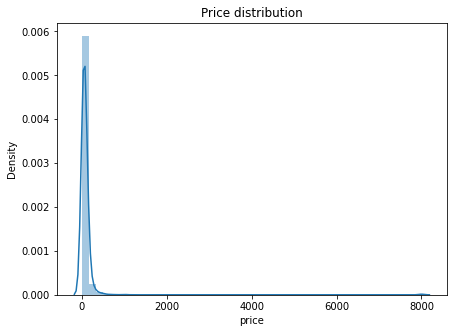

In [23]:
#plotting for price distribution

plt.figure(figsize = (7,5))
sns.distplot(df["price"])
plt.title('Price distribution')
plt.show()

<AxesSubplot:>

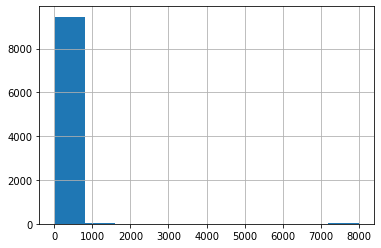

In [24]:
df['price'].hist()

In [25]:
df['log_price'] = np.log(df['price'].values)

<AxesSubplot:>

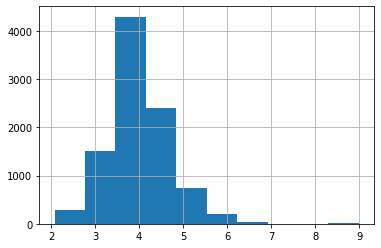

In [26]:
df['log_price'].hist()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 0 to 9639
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   last_scraped                    9500 non-null   object        
 1   name                            9500 non-null   object        
 2   description                     9500 non-null   object        
 3   neighborhood_overview           9500 non-null   object        
 4   host_id                         9500 non-null   int64         
 5   host_since                      9500 non-null   object        
 6   host_location                   9500 non-null   object        
 7   host_about                      9500 non-null   object        
 8   host_response_time              9500 non-null   object        
 9   host_response_rate              9500 non-null   object        
 10  host_acceptance_rate            9500 non-null   object        
 11  host

# How has the number of Airbnb listings changed over time? You might consider creating a line plot or histogram showing the number of listings added per month or year. (You can use host_since column or any other of your choice which you think is relevant)

In [28]:
df_c = df.copy()

In [29]:
df_c['host_year']= pd.DatetimeIndex(df_c['host_since']).year

C:\Users\HP\anaconda3\envs\envi_1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\HP\anaconda3\envs\envi_1\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


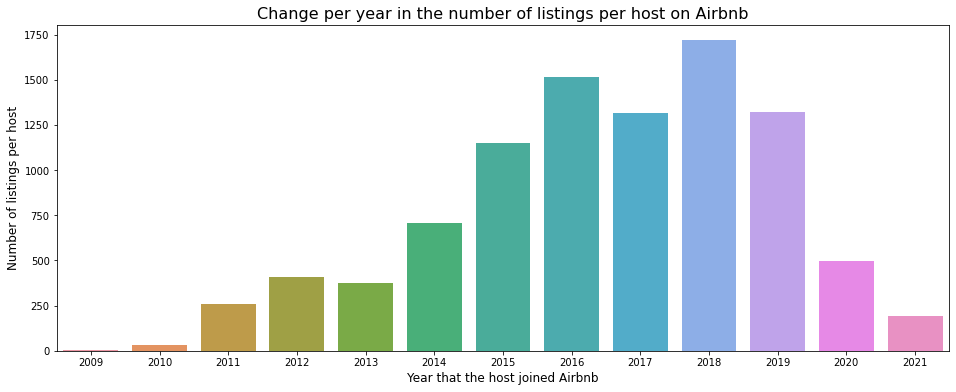

In [30]:
import seaborn as sns
plt.figure(figsize=(16,6))
sns.countplot(df_c['host_year']), np.log(df_c.host_listings_count)
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb', fontsize=16)
plt.show()

# What time of the year has highest rental prices? Try to identify seasonality.

In [31]:
df_a = df.copy()
df_a

,last_scraped,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month,log_price
0,2021-07-17,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,37177,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,...,29,5,3,2015-05-25,2019-04-04,4.790000,t,6,0.39000,4.605170
1,2021-07-17,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,37177,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,...,48,13,0,2015-11-25,2016-02-22,4.850000,t,6,0.70000,4.077537
2,2021-07-17,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,37177,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,...,64,16,1,2015-10-18,2018-03-31,4.830000,t,6,0.91000,3.806662
3,2021-07-17,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,37177,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,...,24,3,0,2015-12-05,2016-08-06,4.790000,t,6,0.35000,4.094345
4,2021-07-17,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,Very close to the apartment building there are...,37177,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,...,17,0,0,2015-11-12,2017-05-15,4.760000,t,6,0.25000,4.234107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9635,2021-07-16,LEMON,ÎÏ ÏÏÏ Î¿ Î¾ÎµÏÏÏÎ¹ÏÏÏÏ ÏÏÏÎ¿Ï ...,Very close to the apartment building there are...,412684947,2021-07-13,GR,Welcome to hommÂ®\n\nThe key to success in all...,within a day,93.27%,...,0,0,0,2011-08-10,2021-07-16,4.743416,t,1,1.57599,3.912023
9636,2021-07-17,Private room in 190sq.m. 60âs apartment,<b>License number</b><br />00001253879,Very close to the apartment building there are...,93001098,2016-09-01,"Athens, Greece",Welcome to hommÂ®\n\nThe key to success in all...,within an hour,100%,...,0,0,0,2011-08-10,2021-07-16,4.743416,t,4,1.57599,2.890372
9637,2021-07-16,ç¦»å°éç«èµ°è·¯3-4åéãæ¥¼ä¸å·¦ææå...,Near the subway station and the light rail sta...,Very close to the apartment building there are...,397803759,2021-04-20,CN,Welcome to hommÂ®\n\nThe key to success in all...,within an hour,100%,...,0,0,0,2011-08-10,2021-07-16,4.743416,t,2,1.57599,4.094345
9638,2021-07-16,3 Bedroom Renovated apt in Kolonaki,A modern decorated apartment in the heart of t...,Very close to the apartment building there are...,1621474,2012-01-18,"Athens, Greece",We are the Îint team: a full service airbnb c...,within an hour,97%,...,0,0,0,2011-08-10,2021-07-16,4.743416,t,65,1.57599,4.812184


In [32]:
df_a.columns

Index(['last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'log_price'],
      dtype='object')

In [33]:
print(f"prices range from {min(df_a.price)} to {max(df_a.price)}.")

prices range from 8.0 to 8000.0.


In [34]:
ma = df_a['price'].max()
ma

8000.0

In [35]:
d_f = df_a[(df_a['price']==ma)]
d_f.head()

,last_scraped,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month,log_price
1234,2021-07-17,*Sunny flat great area E4 (Î.Î£.Î. 1012216 ...,Our lovely apartment is recently renovated and...,Very close to the apartment building there are...,94312648,2016-09-09,GR,Welcome to hommÂ®\n\nThe key to success in all...,within an hour,100%,...,47,1,1,2016-10-09,2021-06-25,4.11,t,18,0.81,8.987197
1235,2021-07-17,*Cosy STUDIO TOP location! E3 (Î.Î£.Î.101221...,Our cosy apartment is in the centre of histori...,Very close to the apartment building there are...,94312648,2016-09-09,GR,Welcome to hommÂ®\n\nThe key to success in all...,within an hour,100%,...,88,1,0,2017-04-02,2019-03-08,4.33,t,18,1.68,8.987197
1237,2021-07-17,*SHINY COSY STUDIO E1(Î.Î£.Î.1012216 ver.1),Our super beautiful apartment is in the centre...,Our neighbourhood is very popular as it ends s...,94312648,2016-09-09,GR,Welcome to hommÂ®\n\nThe key to success in all...,within an hour,100%,...,26,0,0,2016-10-30,2018-11-12,4.12,t,18,0.45,8.987197
1413,2021-07-17,Center of Athensï¸! Î4/D4 (Î.Î£.Î.1012216 ...,"Our cosy flat is super central, in the heart o...",The neighborhood is one of the best in the cen...,94312648,2016-09-09,GR,Welcome to hommÂ®\n\nThe key to success in all...,within an hour,100%,...,37,2,0,2017-02-14,2021-05-15,4.05,t,18,0.69,8.987197
1414,2021-07-17,**SUPER Central +COZY! Î3/D3 (Î.Î£.Î.101221...,My lovely and Cosy apartment is really cute an...,My neighborhood is always full of life .. It e...,94312648,2016-09-09,GR,Welcome to hommÂ®\n\nThe key to success in all...,within an hour,100%,...,66,0,0,2017-02-21,2018-09-03,4.38,t,18,1.23,8.987197


In [36]:
df_a['month'] = pd.DatetimeIndex(df_a['host_since']).month

In [37]:
df_a['month']

0        9
1        9
2        9
3        9
4        9
        ..
9635     7
9636     9
9637     4
9638     1
9639    10
Name: month, Length: 9500, dtype: int64

In [38]:
seasons= {12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
df_a['Season'] = df_a['month'].apply(lambda x: seasons[x])

In [39]:
show = df_a.groupby('Season')['price'].max()
show_df = show.to_frame()

In [40]:
show_df = show_df.reset_index()
show_df

,Season,price
0,Autumn,8000.0
1,Spring,8000.0
2,Summer,8000.0
3,Winter,3533.0


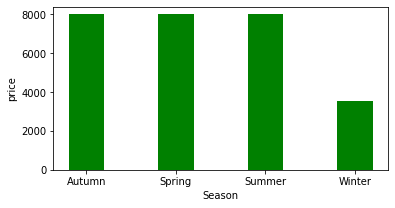

In [41]:
fig = plt.figure(figsize = (6,3))
 
plt.bar(show_df['Season'], show_df['price'], color ='green',width = 0.4)
 
plt.xlabel("Season")
plt.ylabel("price")

plt.show()

# Amenities Analysis

In [42]:
df.amenities[:1].values

array(['["Shampoo", "Kitchen", "Air conditioning", "Long term stays allowed", "Dishes and silverware", "Host greets you", "Microwave", "Single level home", "Iron", "Shower gel", "Patio or balcony", "High chair", "Crib", "Cooking basics", "Dishwasher", "Dedicated workspace", "Central heating", "Bed linens", "Essentials", "Hangers", "Refrigerator", "Wifi \\u2013 50 Mbps", "Free street parking", "Extra pillows and blankets", "Oven", "Laundromat nearby", "Washer", "Coffee maker", "Hot water", "Ethernet connection", "Electric stove", "Hair dryer", "43\\" HDTV"]'],
      dtype=object)

In [43]:
all_amenities = df['amenities'].str.cat(sep=', ').split(', ')

# Count the frequency of each amenity
amenity_counts = {amenity: all_amenities.count(amenity) for amenity in set(all_amenities)}

# Sort amenities based on their frequency
sorted_amenities = sorted(amenity_counts.items(), key=lambda x: x[1], reverse=True)

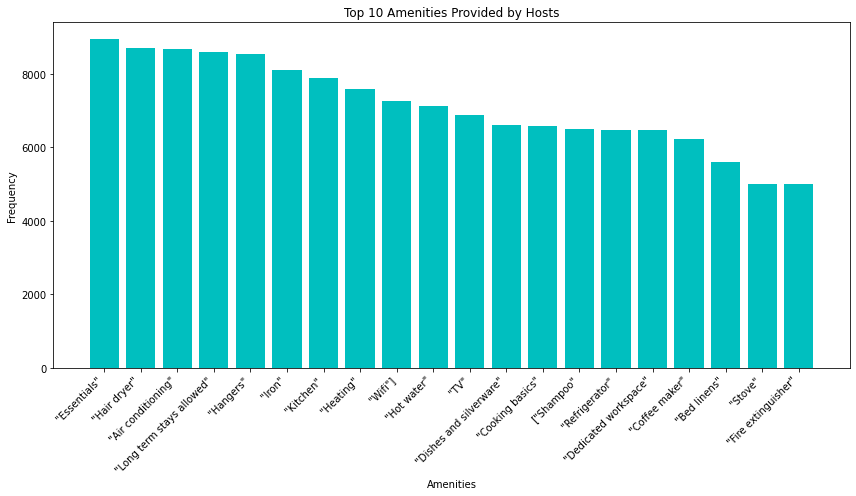

In [44]:
# Select top 20 amenities and their counts
top_20_amenities = [x[0] for x in sorted_amenities[:20]]
top_20_counts = [x[1] for x in sorted_amenities[:20]]

# Create the bar plot
plt.figure(figsize=(12, 7))
plt.bar(top_20_amenities, top_20_counts, color='c')
plt.xlabel('Amenities')
plt.ylabel('Frequency')
plt.title('Top 10 Amenities Provided by Hosts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
df_d = df.copy()
df_d.head(3)

,last_scraped,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month,log_price
0,2021-07-17,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,37177,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,...,29,5,3,2015-05-25,2019-04-04,4.79,t,6,0.39,4.605170
1,2021-07-17,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,37177,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,...,48,13,0,2015-11-25,2016-02-22,4.85,t,6,0.70,4.077537
2,2021-07-17,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,37177,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,...,64,16,1,2015-10-18,2018-03-31,4.83,t,6,0.91,3.806662


In [46]:
# count of amenities
df_d['amenities_count'] = df_d['amenities'].str.split(",").apply(len)

In [47]:
df_am = df_d[['amenities_count','amenities','price']]
df_am

,amenities_count,amenities,price
0,33,"[""Shampoo"", ""Kitchen"", ""Air conditioning"", ""Lo...",100.0
1,33,"[""Shampoo"", ""Kitchen"", ""Air conditioning"", ""Lo...",59.0
2,30,"[""Shampoo"", ""Kitchen"", ""Long term stays allowe...",45.0
3,32,"[""Shampoo"", ""Kitchen"", ""Air conditioning"", ""Lo...",60.0
4,33,"[""Shampoo"", ""Kitchen"", ""Air conditioning"", ""Lo...",69.0
...,...,...,...
9635,6,"[""Kitchen"", ""Air conditioning"", ""TV"", ""Long te...",50.0
9636,11,"[""Elevator"", ""Shampoo"", ""Kitchen"", ""Hot water""...",18.0
9637,13,"[""Elevator"", ""Shampoo"", ""Kitchen"", ""Hot water""...",60.0
9638,12,"[""Kitchen"", ""Coffee maker"", ""Cooking basics"", ...",123.0


# Some amenities are more important than others (i.e.'Air conditioning' or 'balcony' is more likely to increase price than a fax machine), and some are likely to be fairly uncommon (i.e.. 'Electric profiling bed'). Depends which amenities are considered by guests a selection of the more important as well as personal experience.
Differences in PRICES will come for different amenities more deep analysis & EDA will be required. one way we can drop also while building the model.

<AxesSubplot:>

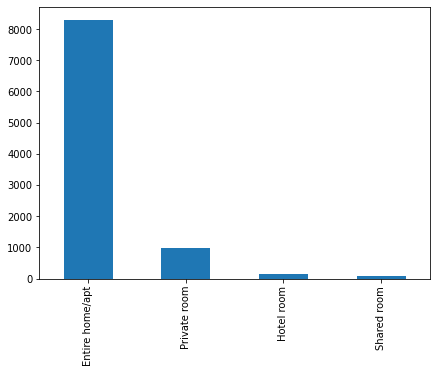

In [48]:
#ROOM TYPES

df_r = df.copy()
df_r['room_type'].value_counts()
df_r['room_type'].value_counts().plot.bar(figsize=(7,5))

In [49]:
room = df_r.groupby('room_type')['price'].describe()
room

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,8302.0,89.317514,374.423845,8.0,39.0,52.0,80.0,8000.0
Hotel room,143.0,255.384615,906.157076,20.0,80.0,125.0,166.5,8000.0
Private room,984.0,79.571138,398.745991,9.0,17.0,28.0,70.0,8000.0
Shared room,71.0,93.676056,175.793367,9.0,10.0,13.0,35.5,500.0


In [50]:
df['price'].describe()

count    9500.000000
mean       90.840316
std       389.732704
min         8.000000
25%        35.000000
50%        50.000000
75%        80.000000
max      8000.000000
Name: price, dtype: float64

In [51]:
ds = df_c.groupby('host_year')['price'].median()

In [52]:
ds.to_frame()
d_s = ds.reset_index()
d_s

,host_year,price
0,2009,64.5
1,2010,50.5
2,2011,64.5
3,2012,55.0
4,2013,55.0
5,2014,56.0
6,2015,50.0
7,2016,45.0
8,2017,50.0
9,2018,49.0


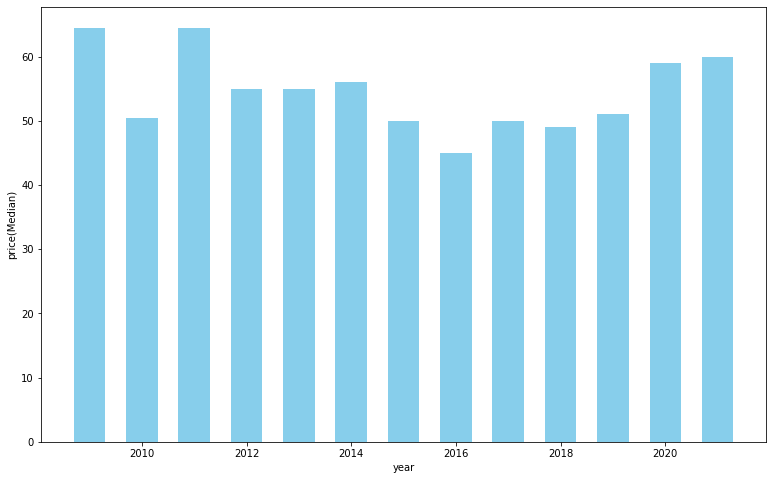

In [53]:
# median price per year
fig = plt.figure(figsize = (13,8))
 
plt.bar(d_s['host_year'], d_s['price'], color ='skyblue',width = 0.6)
 
plt.xlabel("year")
plt.ylabel("price(Median)")

plt.show()

In [54]:
#mean of price per year
dw = df_c.groupby('host_year')['price'].mean()
dw.to_frame()
d_w = dw.reset_index()
d_w

,host_year,price
0,2009,67.000000
1,2010,75.281250
2,2011,100.284615
3,2012,82.009804
4,2013,74.000000
5,2014,75.087943
6,2015,65.986111
7,2016,103.798286
8,2017,91.541445
9,2018,86.853403


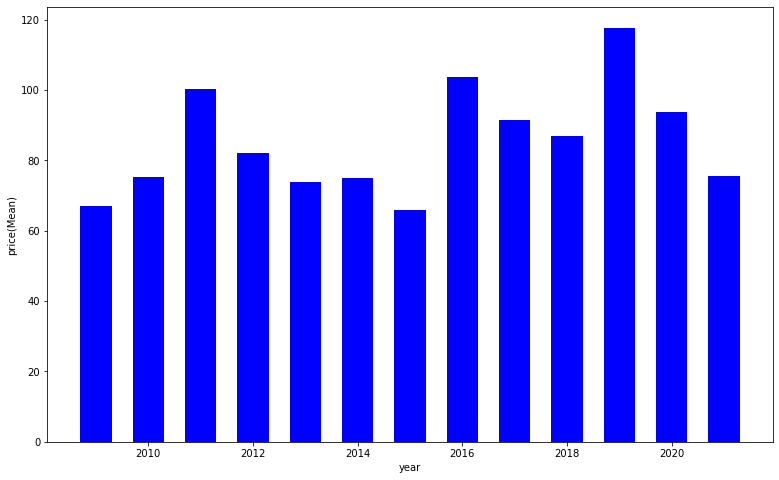

In [55]:
fig = plt.figure(figsize = (13,8))
 
plt.bar(d_w['host_year'], d_w['price'], color ='blue',width = 0.6)
 
plt.xlabel("year")
plt.ylabel("price(Mean)")

plt.show()

Features with correlations for host (in descending order):
price                     1.000000
host_response_rate        0.034358
host_verifications        0.030733
host_identity_verified    0.028723
host_about                0.018603
host_location             0.016865
host_neighbourhood        0.016281
host_acceptance_rate      0.016246
host_has_profile_pic      0.000753
host_listings_count       0.000211
host_is_superhost        -0.034187
host_response_time       -0.038114
Name: price, dtype: float64


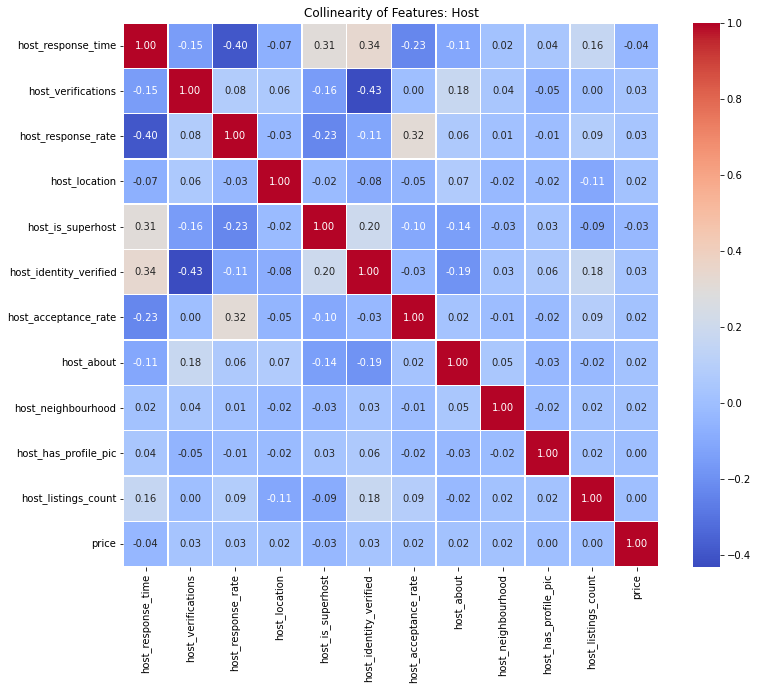

In [56]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':  # Check if the column is of object data type (i.e., categorical)
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

# List of columns to include in correlation analysis
include_cols = ['host_response_time', 'host_verifications', 'host_response_rate',
                'host_location', 'host_is_superhost', 'host_identity_verified',
                'host_acceptance_rate', 'host_about', 'host_neighbourhood',
                'host_has_profile_pic', 'host_listings_count', 'price']

# Calculate the correlation matrix for the specified columns
correlation_matrix = df_encoded[include_cols].corr()

# Print correlations with 'price' in descending order
print("Features with correlations for host (in descending order):")
print(correlation_matrix['price'].sort_values(ascending=False))

# Create a heatmap with annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Collinearity of Features: Host")
plt.show()

# There is positive relationship between price & host_response_rate but a weak one that will affect much. Negative relationship between price & host_is_superhost (inverse). 

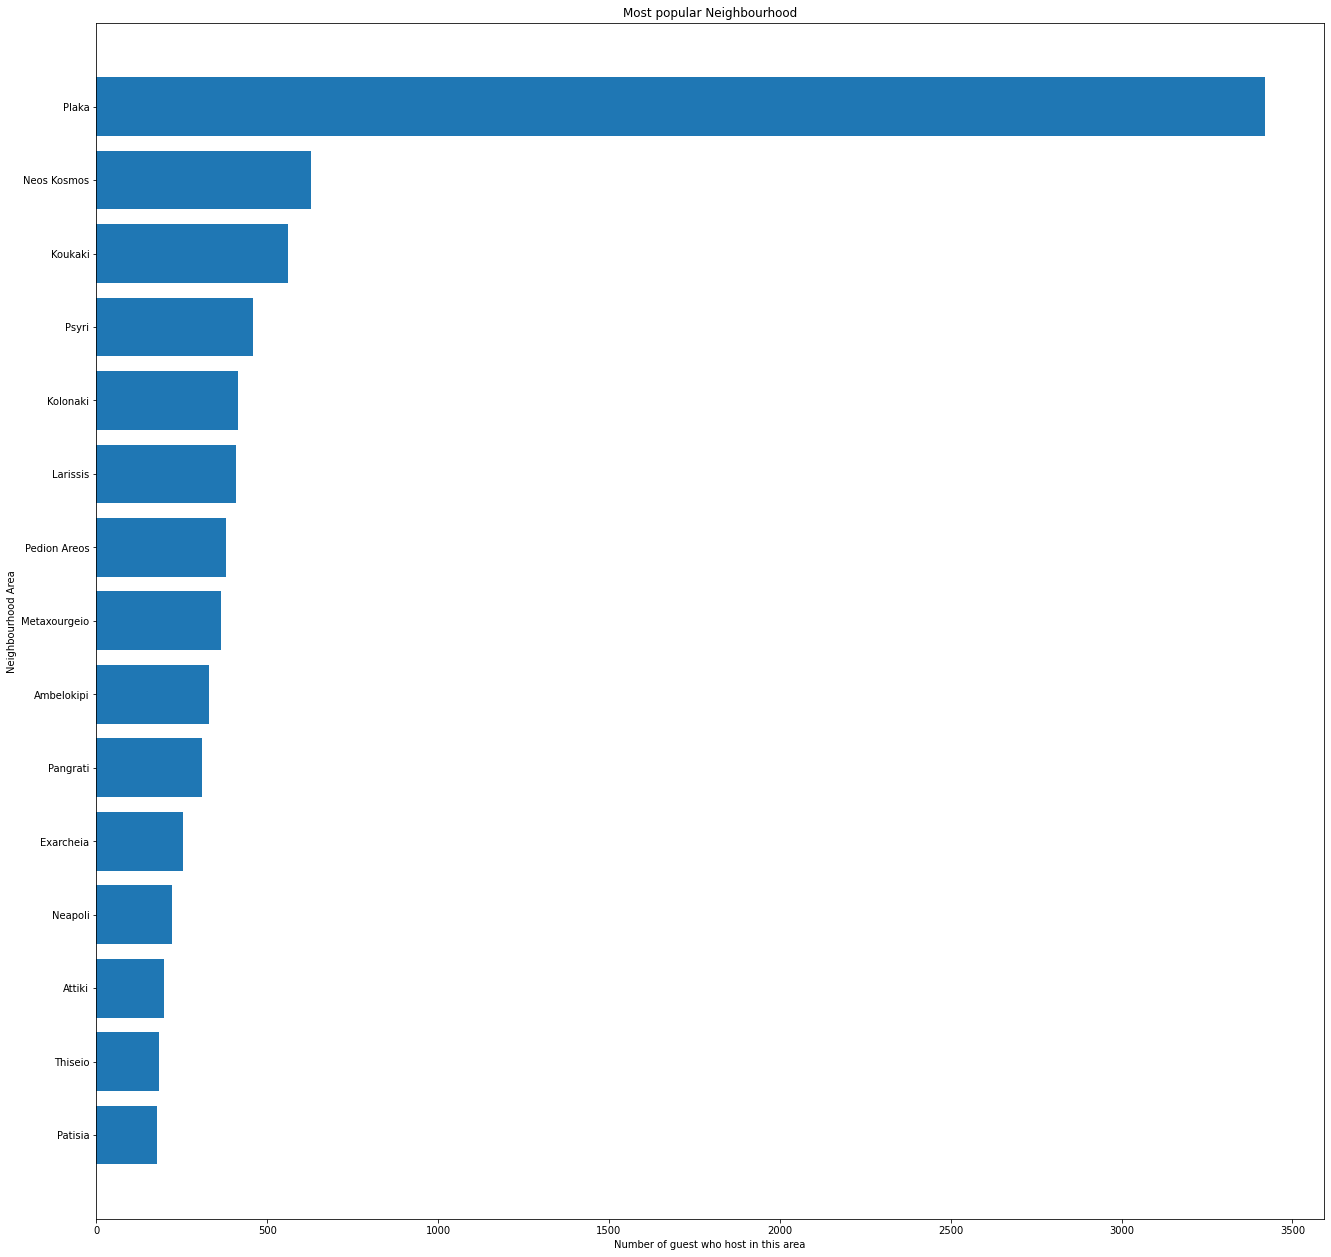

In [57]:
# Neighbourhood 

data = df.host_neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

In [58]:
#10 Neighbourhood with lower mean price
data_n = df.groupby('host_neighbourhood')['price'].describe().sort_values(by=['mean'])[:10]
data_n

,count,mean,std,min,25%,50%,75%,max
host_neighbourhood,,,,,,,,
La Chapelle,3.0,22.000000,6.557439,16.0,18.5,21.0,25.0,29.0
Chelsea,1.0,23.000000,NaN,23.0,23.0,23.0,23.0,23.0
Kato Petralona,2.0,29.000000,4.242641,26.0,27.5,29.0,30.5,32.0
Castello,1.0,30.000000,NaN,30.0,30.0,30.0,30.0,30.0
Rouf,3.0,33.666667,6.350853,30.0,30.0,30.0,35.5,41.0
Esquilino,1.0,35.000000,NaN,35.0,35.0,35.0,35.0,35.0
NeukÃ¶lln,1.0,35.000000,NaN,35.0,35.0,35.0,35.0,35.0
Sepolia,25.0,36.760000,8.074032,24.0,30.0,35.0,45.0,50.0
Rizoupoli,13.0,38.076923,14.349573,21.0,25.0,40.0,50.0,60.0


In [59]:
#10 Neighbourhood with higher mean price
data_ne = df.groupby('host_neighbourhood')['price'].describe().sort_values(by=['mean'],ascending=False)[:10]
data_ne

,count,mean,std,min,25%,50%,75%,max
host_neighbourhood,,,,,,,,
Bastille,1.0,300.000000,NaN,300.0,300.00,300.0,300.00,300.0
Punta Cancun,6.0,284.833333,101.128466,203.0,225.75,258.5,285.25,480.0
Metaxourgeio,366.0,236.803279,1163.446265,12.0,35.00,46.0,70.00,8000.0
Stepney,1.0,235.000000,NaN,235.0,235.00,235.0,235.00,235.0
Jimbaran,10.0,201.500000,49.612386,150.0,152.50,197.5,236.25,285.0
Tsentar,10.0,166.900000,110.584759,55.0,92.00,105.5,238.75,379.0
Monastiraki,29.0,148.000000,99.318391,25.0,60.00,134.0,199.00,400.0
Neos Kosmos,627.0,130.666667,708.108193,9.0,38.00,50.0,74.00,8000.0
Gazi,121.0,124.272727,202.846535,12.0,38.00,53.0,86.00,1500.0


In [60]:
#Top 10 neighbourhood with max price
data_l = df.groupby('host_neighbourhood')['price'].max().sort_values(ascending=False)[:10]
data_l

host_neighbourhood
Metaxourgeio      8000.0
Neos Kosmos       8000.0
Exarcheia         8000.0
Psyri             8000.0
Patisia           8000.0
Pedion Areos      8000.0
Plaka             8000.0
Petralona         5000.0
Agios Nikolaos    3533.0
Kypseli           1774.0
Name: price, dtype: float64

In [61]:
df.shape

(9500, 44)

In [62]:
df.columns

Index(['last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'log_price'],
      dtype='object')

In [63]:
df = df.drop(columns='log_price')

In [64]:
df.shape

(9500, 43)

<AxesSubplot:>

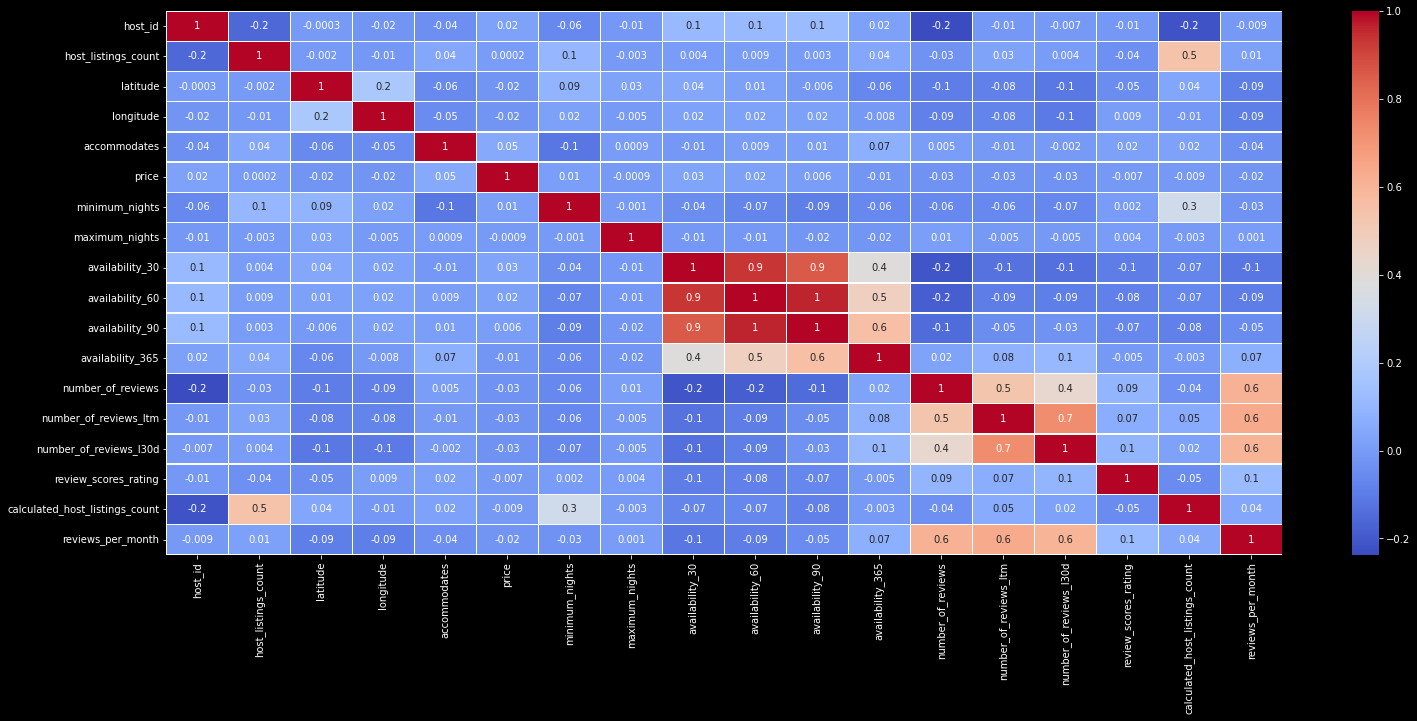

In [65]:
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(25,10))         # figsize
sns.heatmap(df.corr(),annot=True, linewidths=.3 ,fmt='.1g', cmap= 'coolwarm')

In [66]:
cols_to_drop = ['name','description','neighborhood_overview',
       'availability_90','last_scraped','number_of_reviews_ltm','number_of_reviews_l30d',
                        'availability_365','neighbourhood_cleansed','host_verifications']
        
data = df.drop(cols_to_drop, axis=1)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 0 to 9639
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         9500 non-null   int64         
 1   host_since                      9500 non-null   object        
 2   host_location                   9500 non-null   object        
 3   host_about                      9500 non-null   object        
 4   host_response_time              9500 non-null   object        
 5   host_response_rate              9500 non-null   object        
 6   host_acceptance_rate            9500 non-null   object        
 7   host_is_superhost               9500 non-null   object        
 8   host_neighbourhood              9500 non-null   object        
 9   host_listings_count             9500 non-null   float64       
 10  host_has_profile_pic            9500 non-null   object        
 11  host

In [68]:
data.shape

(9500, 33)

In [69]:
#count of amenities

data['amenities_count'] = data['amenities'].str.split(",").apply(len)

In [70]:
cat_col = []
for column in data.columns:
    
    if data[column].dtypes !='int64' and data[column].dtypes !='float64':
        cat_col.append(column)

In [71]:
cat_col

['host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_has_profile_pic',
 'host_identity_verified',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'instant_bookable']

In [72]:
# Encoding Data (categorical to numerical)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 0 to 9639
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         9500 non-null   int64  
 1   host_since                      9500 non-null   int32  
 2   host_location                   9500 non-null   int32  
 3   host_about                      9500 non-null   int32  
 4   host_response_time              9500 non-null   int32  
 5   host_response_rate              9500 non-null   int32  
 6   host_acceptance_rate            9500 non-null   int32  
 7   host_is_superhost               9500 non-null   int32  
 8   host_neighbourhood              9500 non-null   int32  
 9   host_listings_count             9500 non-null   float64
 10  host_has_profile_pic            9500 non-null   int32  
 11  host_identity_verified          9500 non-null   int32  
 12  latitude                        95

<AxesSubplot:>

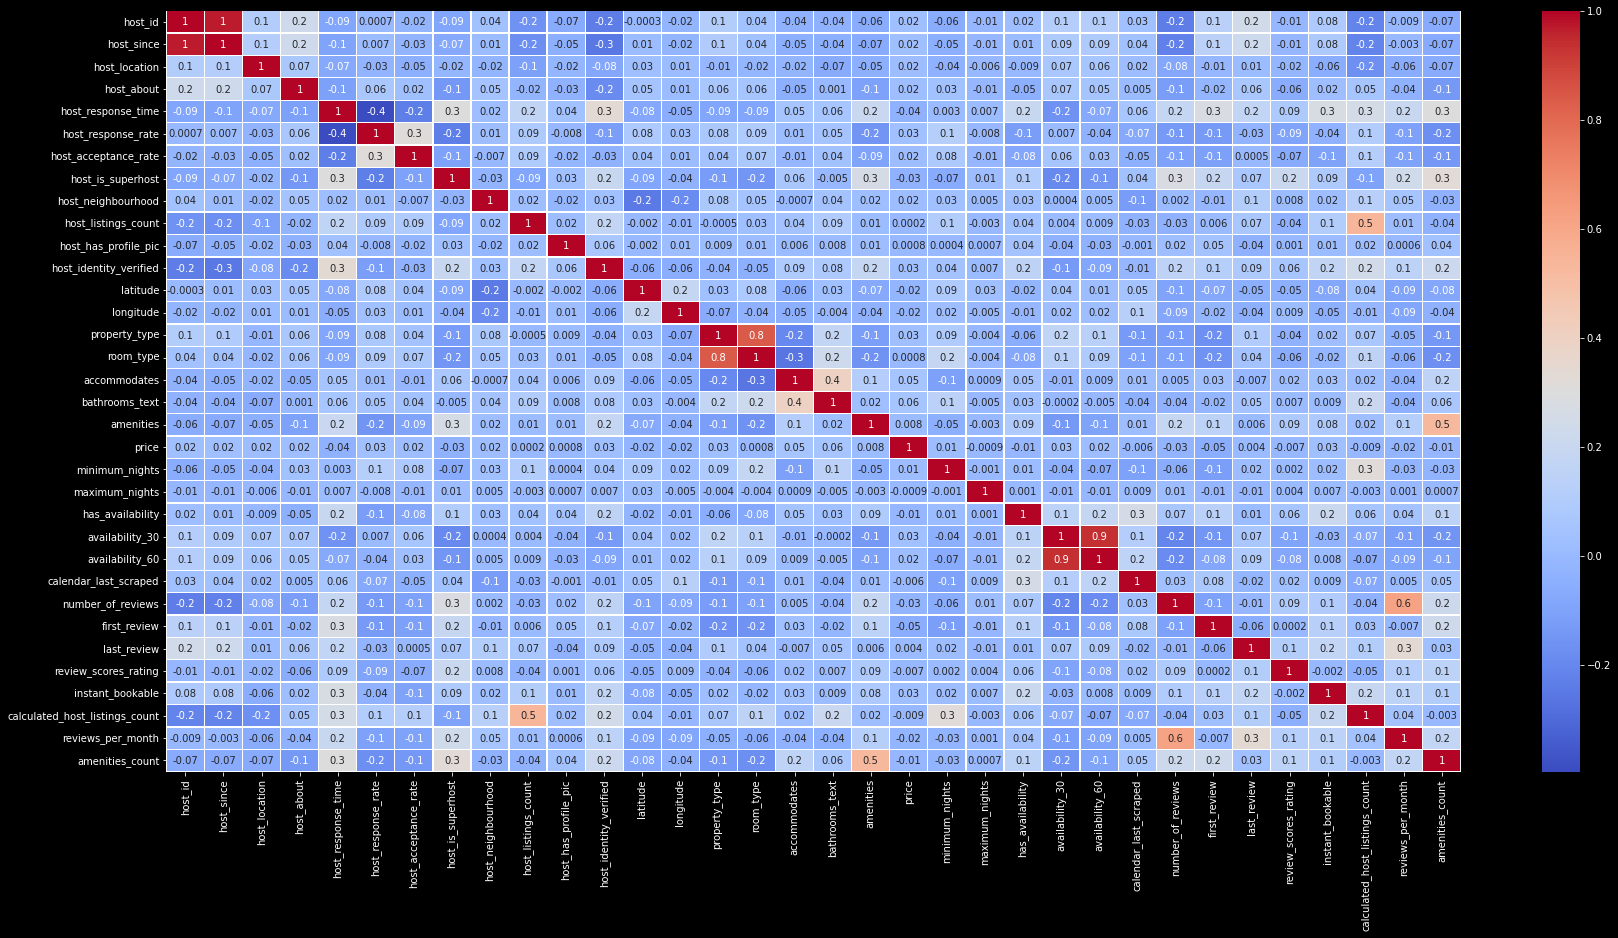

In [75]:
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(29,14))
sns.heatmap(data.corr(),annot=True, linewidths=.3 ,fmt='.1g', cmap= 'coolwarm')

In [76]:
X = data.drop(['price'],axis=1)
y = np.log(data['price'])


# TRAIN TEST SPLIT

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# MODEL BUILDING

In [78]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score,mean_absolute_error

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_p = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_p)
r2_lr = r2_score(y_test, y_p)
print('Mean Absolute Error of Linear Regression is: ', mae_lr)
print('\nR2 Score of Linear Regression            : ', r2_lr)

Mean Absolute Error of Linear Regression is:  0.4011113360772412

R2 Score of Linear Regression            :  0.2727812535247993


In [80]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor as RFR

In [81]:
rf = RFR(max_features = 0.45,max_depth=15,n_estimators=1200)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_rf)
r2_rf = r2_score(y_test, y_rf)
print('Mean Absolute Error of Linear Regression is: ', mae_rf)
print('\nR2 Score of Linear Regression            : ', r2_rf)

Mean Absolute Error of Linear Regression is:  0.30822371533096315

R2 Score of Linear Regression            :  0.5842847779628653


In [82]:
#Gradient Boosting & XGBOOST

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [83]:
gd = GradientBoostingRegressor(n_estimators=1200)
gd.fit(X_train,y_train)
y_gd = gd.predict(X_test)

mae_gd = mean_absolute_error(y_test, y_gd)
r2_gd = r2_score(y_test, y_gd)
print('Mean Absolute Error of Linear Regression is: ', mae_gd)
print('\nR2 Score of Linear Regression            : ', r2_gd)

Mean Absolute Error of Linear Regression is:  0.29884512944048025

R2 Score of Linear Regression            :  0.5923061182568252


In [84]:
xg = XGBRegressor()
xg.fit(X_train,y_train)
y_xg = xg.predict(X_test)

mae_xg = mean_absolute_error(y_test, y_xg)
r2_xg = r2_score(y_test, y_xg)
print('Mean Absolute Error of Linear Regression is: ', mae_xg)
print('\nR2 Score of Linear Regression            : ', r2_xg)

Mean Absolute Error of Linear Regression is:  0.29994589575148434

R2 Score of Linear Regression            :  0.5896175021457313


In [85]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,
          "Gradient Boosting":r2_gd ,
          "XGBoost": r2_xg}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "Gradient Boosting":mae_gd ,
          "XGBoost": mae_xg}

In [86]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])

In [87]:
n = pd.concat([a1, a2], axis = 1)
n

,R2 SCORE,MEAN ABSOLUTE ERROR
Linear Regression,0.272781,0.401111
Random Forest,0.584285,0.308224
Gradient Boosting,0.592306,0.298845
XGBoost,0.589618,0.299946


# THE BEST MODEL WE CAN SELECT IS GRADIENT BOOSTING

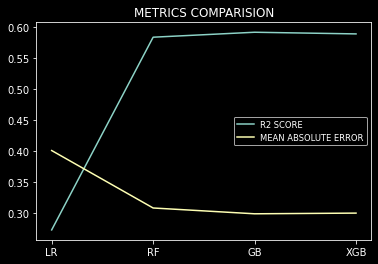

In [88]:
alg = ['LR','RF','GB','XGB']
plt.plot(alg,a1)
plt.plot(alg,a2)

legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='small')
plt.show()